In [1]:
# install package
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = "example.png"
origin_img = cv2.imread(path)

In [3]:
# define court size
width = 1800
height = 900

In [4]:
cp_origin = []

In [5]:
def click(event, x, y, flags, params):
    global cp_origin
    if event == cv2.EVENT_LBUTTONDOWN:
        cp_origin.append([x,y])
        print(x, y)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cp_origin = []
        print("clear")

In [6]:
# Click on corners of the court in the order of TL, BL, BR, TR.
#  can be 
cv2.imshow("window1", origin_img)
cv2.setMouseCallback("window1", click)
cv2.waitKey(0)
cv2.destroyAllWindows()

114 155
28 782
1465 783
1371 134


In [7]:
# TL BL BR TR
cp_origin = np.float32(cp_origin)
cp_trans = np.float32([[0,0], [0, height], [width, height], [width, 0]])
print(cp_origin)

[[ 114.  155.]
 [  28.  782.]
 [1465.  783.]
 [1371.  134.]]


In [8]:
M = cv2.getPerspectiveTransform(cp_origin, cp_trans)
trans_img = cv2.warpPerspective(origin_img, M, (width, height))
print(M)

[[ 1.54555101e+00  2.11989453e-01 -2.09051180e+02]
 [ 2.85194588e-02  1.70709332e+00 -2.67850683e+02]
 [ 3.28430486e-05  2.37378793e-04  1.00000000e+00]]


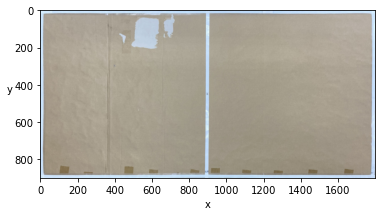

In [11]:
# cv2 : BGR
# matplotlib : RGB
plot_img = cv2.cvtColor(trans_img, cv2.COLOR_BGR2RGB)
plt.xlabel("x")
plt.ylabel("y", rotation = "horizontal")
plt.imshow(plot_img)

In [12]:
cv2.imwrite("trans_img.png", trans_img)

True